# 1. Load Dataset

In [1]:
#Visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, pipeline

#Train models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#Model selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [ ]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('/content/hlb_data.csv')

# 2. Derive Average CASA_DAB

In [ ]:
# derive avg CASA
df['AVG_CASA_DAB'] = (df['CASA_DAB_JAN19'] + df['CASA_DAB_FEB19'] + df['CASA_DAB_MAR19'] + df['CASA_DAB_APR19'] + df['CASA_DAB_MAY19'] + df['CASA_DAB_JUN19'] + df['CASA_DAB_JUL19']  + df['CASA_DAB_AUG19'] + df['CASA_DAB_SEP19'] + df['CASA_DAB_OCT19'] + df['CASA_DAB_NOV19'] + df['CASA_DAB_DEC19'] + df['CASA_DAB_JAN20'] + df['CASA_DAB_FEB20'] + df['CASA_DAB_MAR20'] + df['CASA_DAB_APR20'] + df['CASA_DAB_MAY20'] + df['CASA_DAB_JUN20'] + df['CASA_DAB_JUL20'] + df['CASA_DAB_AUG20'])/20
display(df['AVG_CASA_DAB'])

0          6992.944500
1        223455.956000
2           433.177000
3         17346.739500
4          3523.887500
             ...      
48121     76537.312500
48122     40089.722000
48123     63146.344685
48124      2498.306500
48125      9564.128500
Name: AVG_CASA_DAB, Length: 48126, dtype: float64

# 3. Verify dataset quality (Correlation matrix)

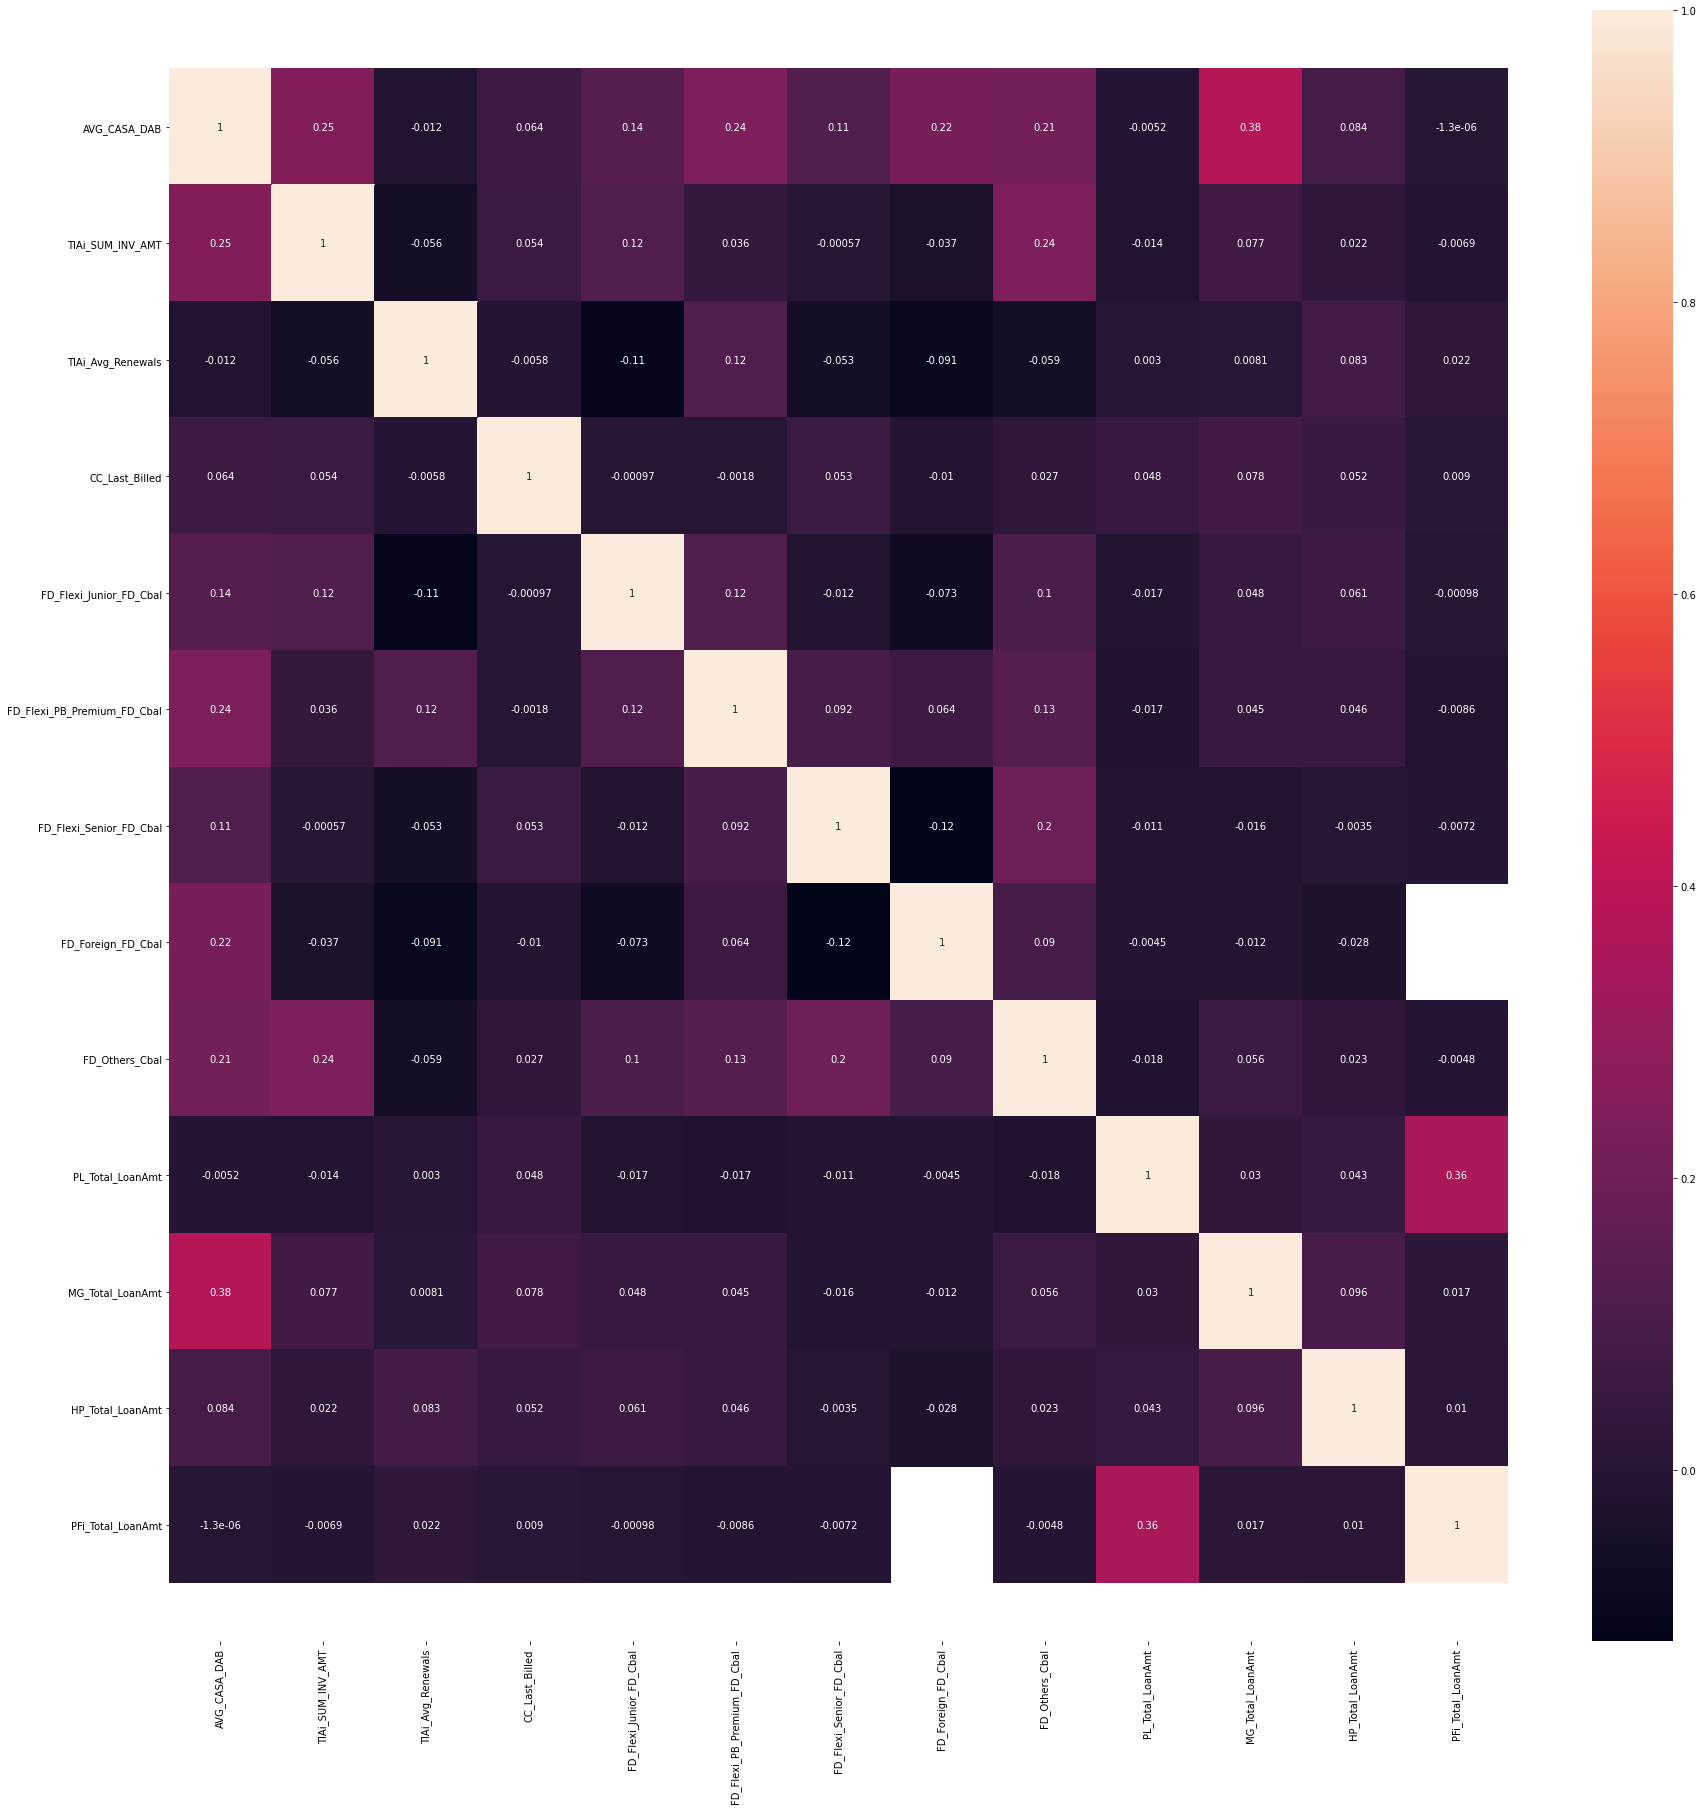

In [ ]:
selected_corr = pd.DataFrame(df, columns=['AVG_CASA_DAB','TIAi_SUM_INV_AMT', 'TIAi_Avg_Renewals','CC_Last_Billed','FD_Flexi_Junior_FD_Cbal','FD_Flexi_PB_Premium_FD_Cbal','FD_Flexi_Senior_FD_Cbal','FD_Foreign_FD_Cbal',
'FD_Others_Cbal','PL_Total_LoanAmt', 'MG_Total_LoanAmt','HP_Total_LoanAmt','PFi_Total_LoanAmt']) 
selected_corr.dropna()
plt.figure(figsize=(30,30))
ax = sns.heatmap(selected_corr.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
# plt.savefig('corr_map.png')

# 4. Data Distributions

1. Customer Type

Mass    44986
PB       3129
PV         11
Name: Customer_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


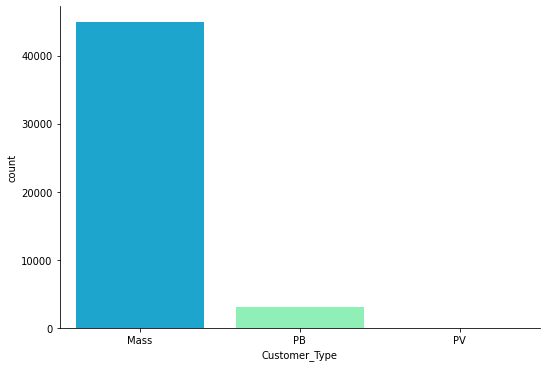

In [ ]:
#Customer_Type attribute
display(df.Customer_Type.value_counts()) 
sns.factorplot(x='Customer_Type',data=df,kind='count',size=5,aspect=1.5, palette='rainbow')

2. Age

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


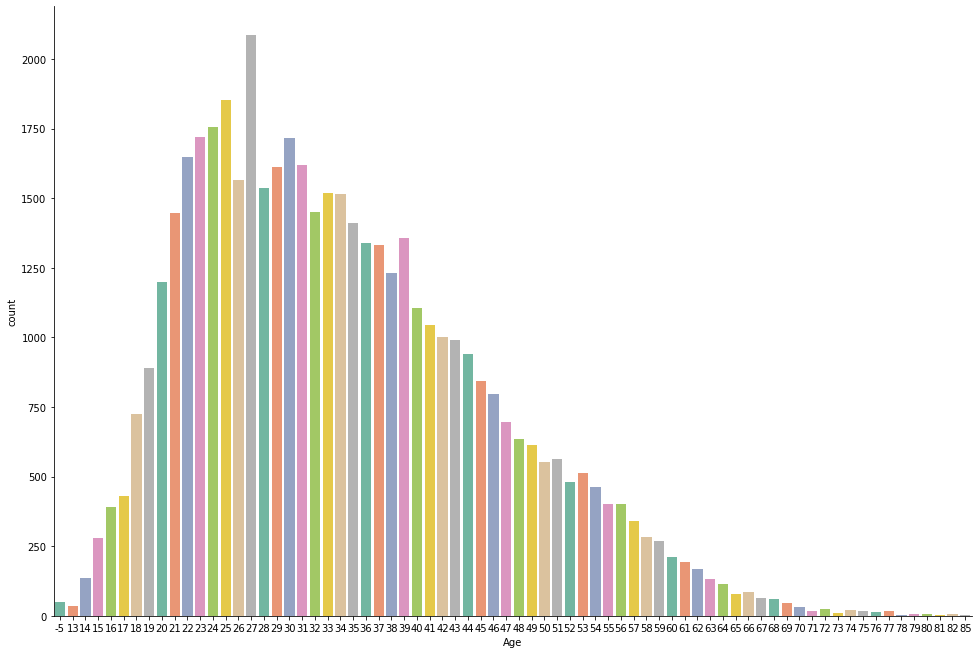

In [ ]:
sns.factorplot(x='Age',data=df,kind='count',size=9,aspect=1.5, palette='Set2')

3. Gender


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


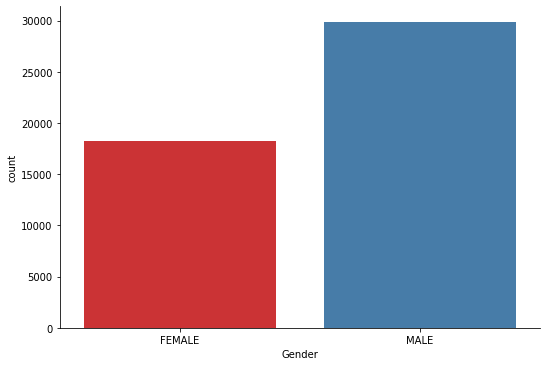

In [ ]:
sns.factorplot(x='Gender',data=df,kind='count',size=5,aspect=1.5, palette='Set1')


4. Marital Status

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


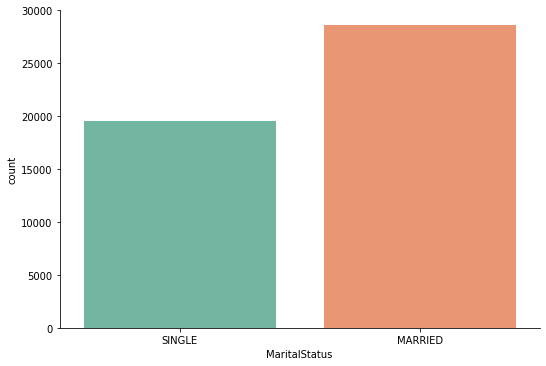

In [ ]:
sns.factorplot(x='MaritalStatus',data=df,kind='count',size=5,aspect=1.5, palette='Set2')


5. Ethnic


CHINESE                     45872
INDIAN                        868
OTHERS                        830
MALAY                         305
No Description                176
FOREIGNER WITH PR STATUS       18
EURASIAN                        7
Name: Ethnic, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


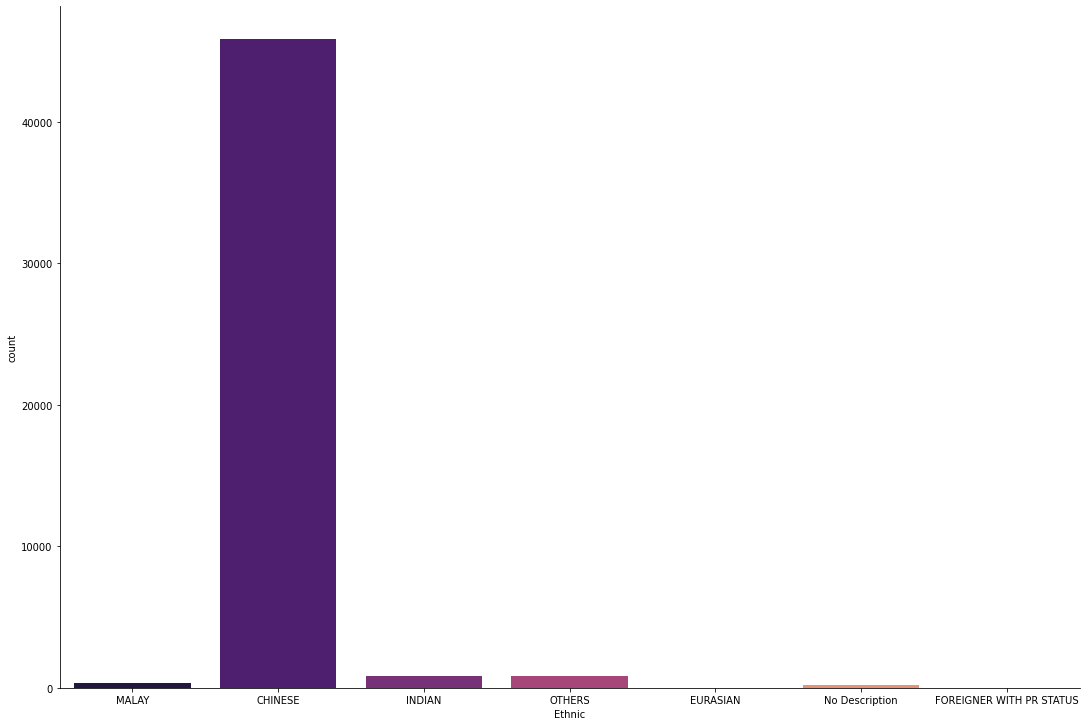

In [ ]:
print(df.Ethnic.value_counts()) 

sns.factorplot(x='Ethnic',data=df,kind='count',size=10,aspect=1.5, palette='magma')


6. Nationality

In [ ]:
df.Nationality.value_counts()

MALAYSIA               47568
CHINA                    121
SINGAPORE                116
INDONESIA                 34
HONG KONG                 30
KOREA REP. SOUTH          28
JAPAN                     27
INDIA                     27
TAIWAN                    20
PHILIPPINES               17
UNITED KINGDOM            14
VIETNAM                   10
THAILAND                   7
AUSTRALIA                  6
BANGLADESH                 6
U/STATES OF AMERICA        4
MYANMAR                    4
PAKISTAN                   4
NETHERLANDS                3
NEPAL                      3
NEW ZEALAND                3
CANADA                     3
BELGIUM                    2
GERMANY                    2
FRANCE                     2
CAMBODIA                   1
No Description             1
SWEDEN                     1
SWITZERLAND                1
VENEZUELA                  1
AUSTRIA                    1
NIGERIA                    1
ARGENTINA                  1
AZERBAIJAN                 1
NAMIBIA       

7. Occupation Group

PROFESSIONALS                                            12490
LEGISLATORS, SENIOR OFFICIALS AND MANAGERS                9156
NON-EMPLOYED / NON-GAINFULLY EMPLOYED                     8126
CLERICAL, SECRETARIAL AND ADMINISTRATIVE RELATED          6099
SALES WORKERS RELATED                                     4310
TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESSIONALS     3752
ENTREPRENEURS AND BUSINESS OWNERS                         1251
SERVICE WORKERS RELATED                                   1096
ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER            819
ELEMENTARY OCCUPATIONS                                     315
EXEBB CONVERSION                                            53
UNIFORMED AND ARMED FORCES                                  13
Name: Occupation_Group, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


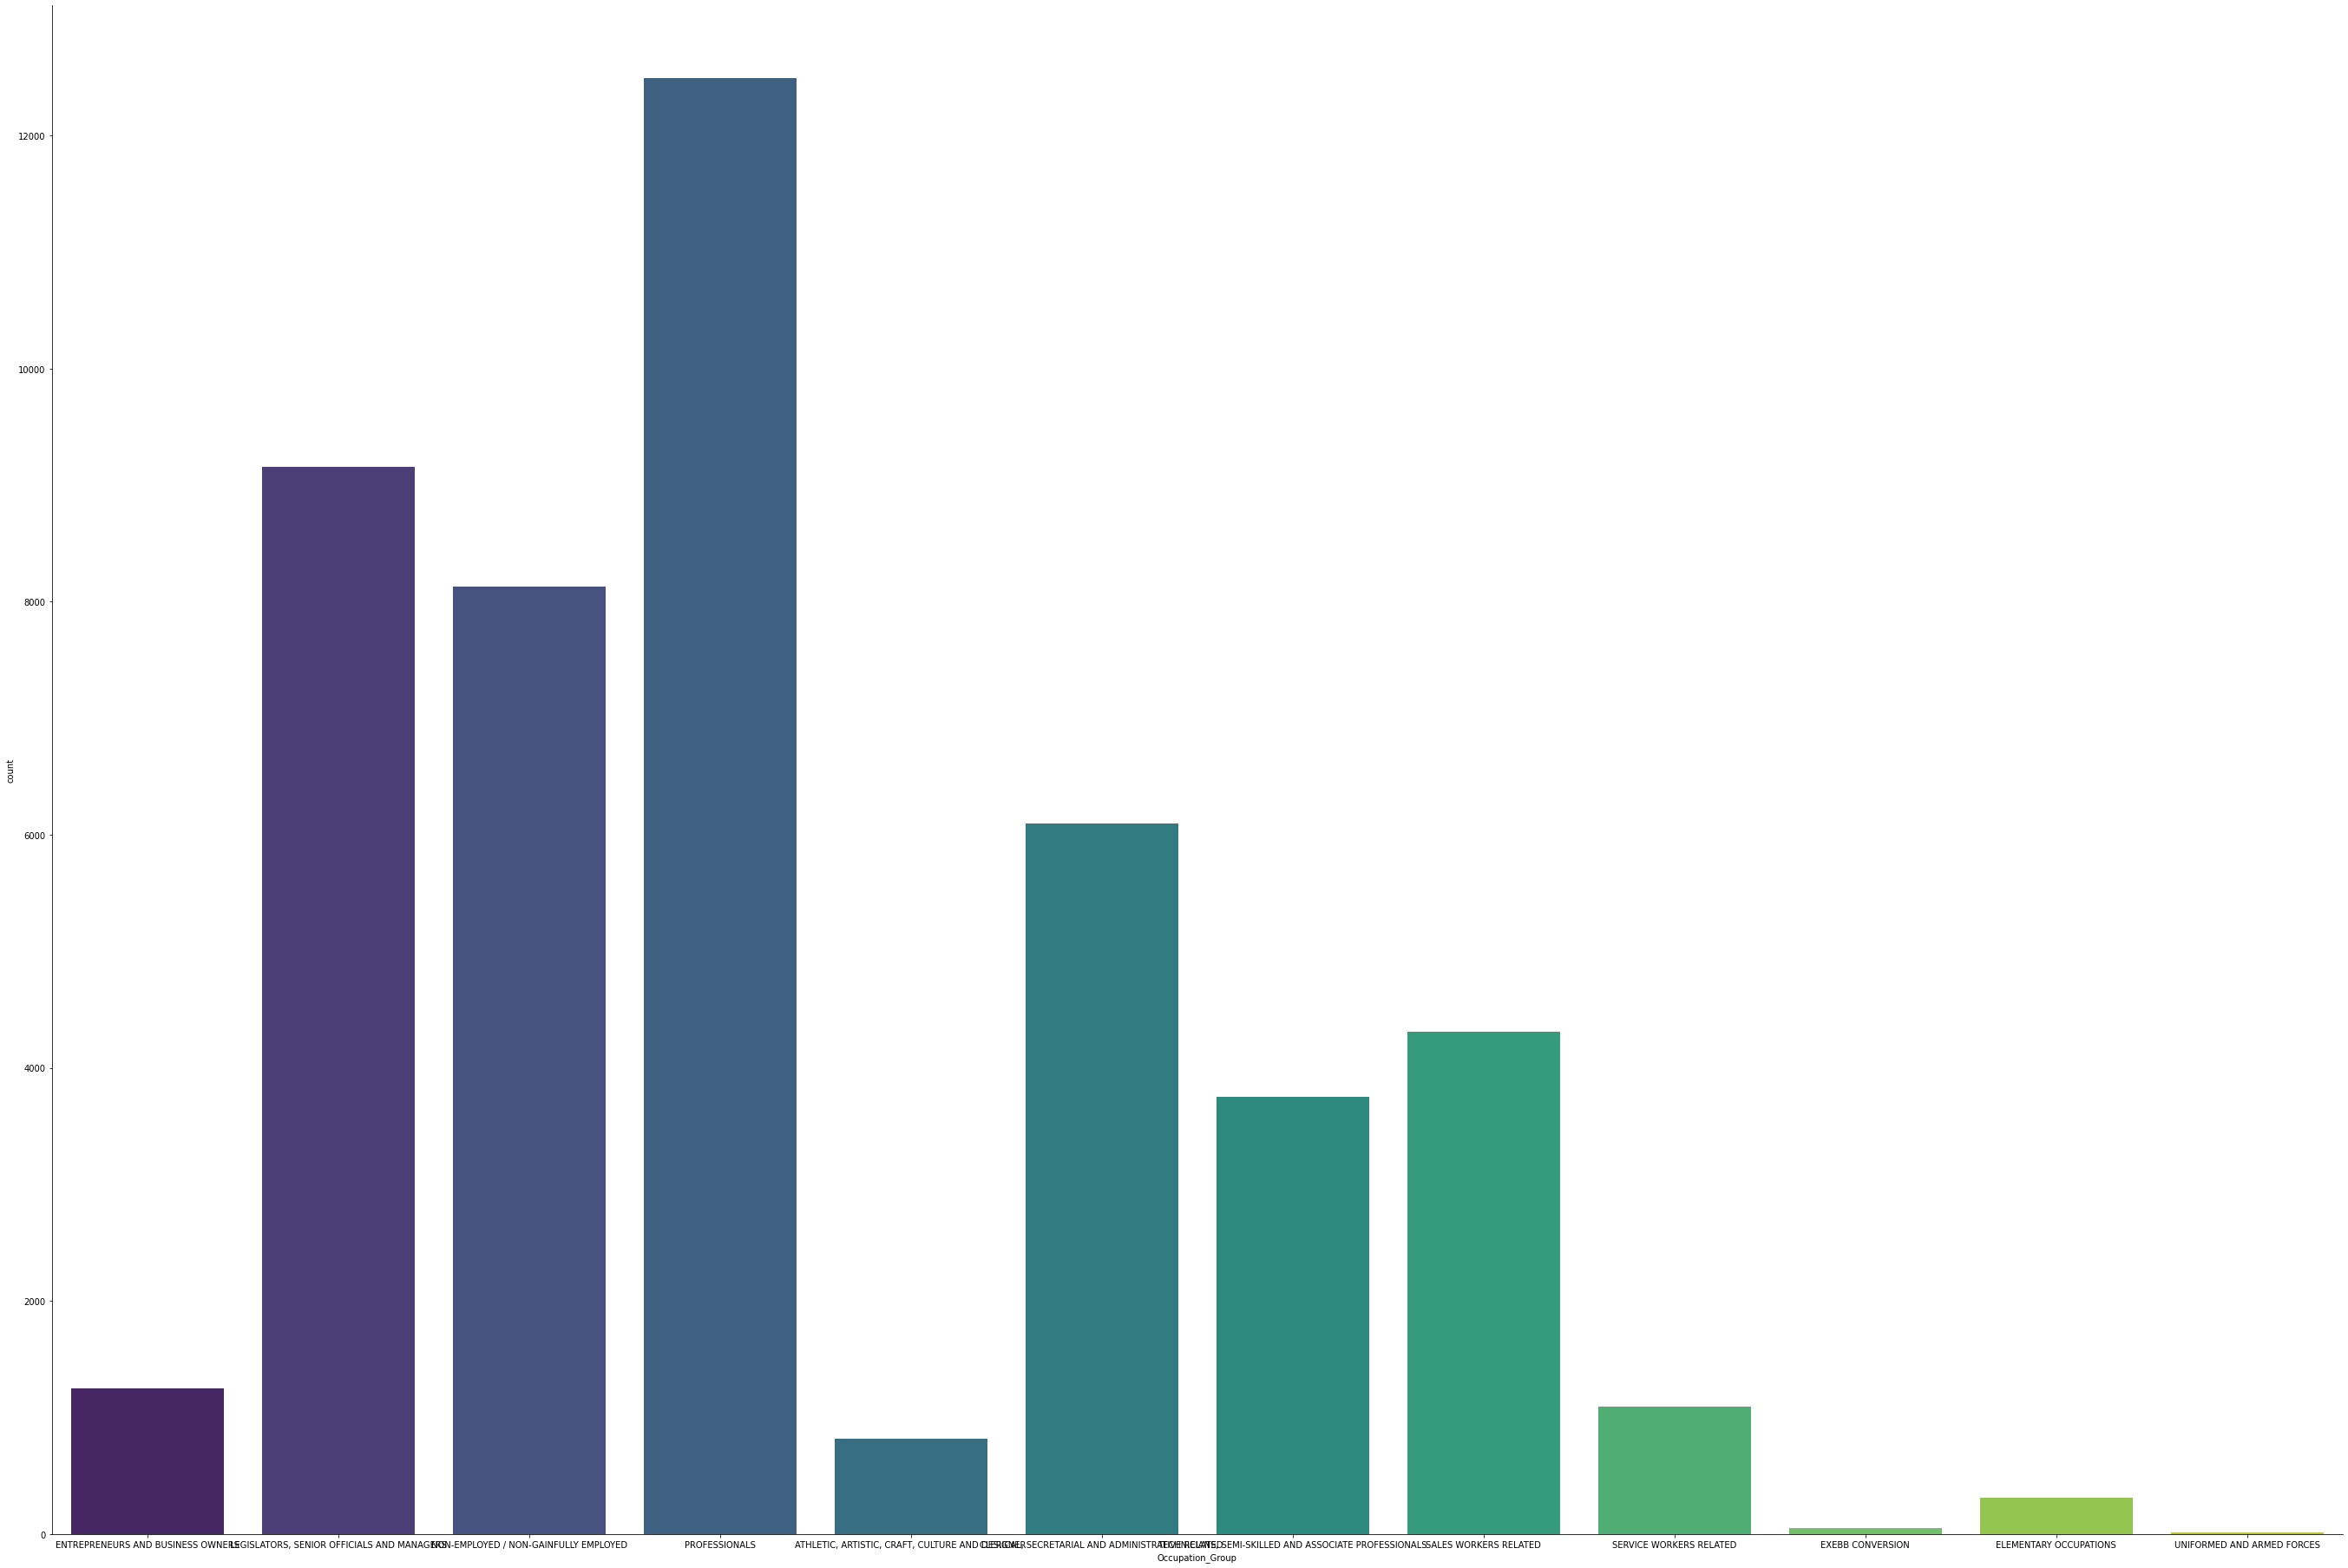

In [ ]:
print(df.Occupation_Group .value_counts()) 

sns.factorplot(x='Occupation_Group',data=df,kind='count',size=25,aspect=1.5, palette='viridis')


8. Does customer use Internet Banking?

Y    48125
N        1
Name: IB, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


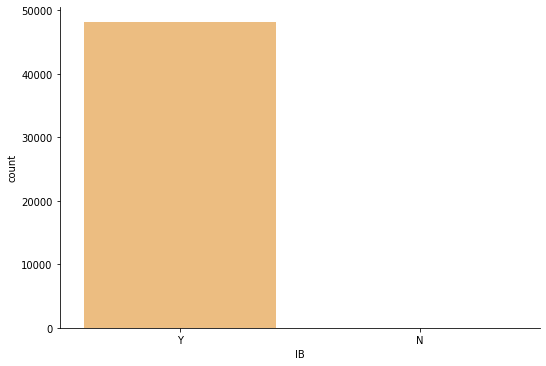

In [ ]:
print(df.IB.value_counts()) 
sns.factorplot(x='IB',data=df,kind='count',size=5,aspect=1.5, palette='Spectral')

9. Does customer use Mobile Banking service?


Y    40989
N     7137
Name: MB, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


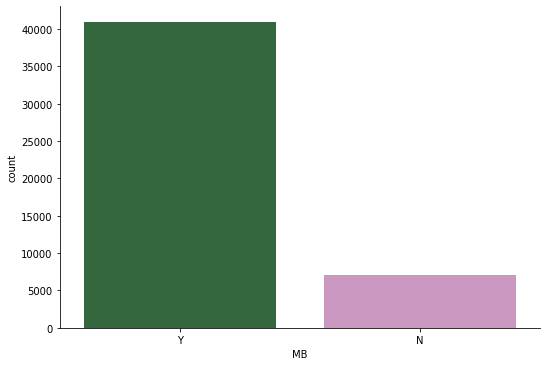

In [ ]:
print(df.MB.value_counts()) 
sns.factorplot(x='MB',data=df,kind='count',size=5,aspect=1.5, palette='cubehelix')

# 5. Machine Learning Model

1. Preprocessing Data

In [ ]:
df.drop(['CIFNO','FD_Flexi_Junior_FD','FD_Flexi_PB_Premium_FD','FD_Flexi_Senior_FD','FD_Foreign_FD','FD_Flexi_One_FD','FD_Others','FD_Flexi_Junior_FD_Cbal','FD_Flexi_PB_Premium_FD_Cbal','FD_Flexi_Senior_FD_Cbal','FD_Foreign_FD_Cbal','FD_Flexi_One_FD_Cbal','FD_Others_Cbal','AVG_CASA_DAB','TIAi_Total_Cnt_FDR','TIAi_Duration_Mths','TIAi_SUM_INV_AMT','TIAi_FDR_Status','TIAi_Avg_Renewals','CASA_DAB_JAN19','CASA_DAB_FEB19','CASA_DAB_MAR19','CASA_DAB_APR19','CASA_DAB_MAY19','CASA_DAB_JUN19','CASA_DAB_JUL19','CASA_DAB_AUG19','CASA_DAB_SEP19','CASA_DAB_OCT19','CASA_DAB_NOV19','CASA_DAB_DEC19','CASA_DAB_JAN20','CASA_DAB_FEB20','CASA_DAB_MAR20','CASA_DAB_APR20','CASA_DAB_MAY20','CASA_DAB_JUN20','CASA_DAB_JUL20','CASA_DAB_AUG20','CASA_CA','CASA_SA','CASA_MPlus','CASA_ONE_ACCOUNT','CASA_PAYNSAVE','CASA_FCA_CA','CASA_MCF','CASA_CA_Cbal','CASA_SA_Cbal','CASA_MPlus_Cbal','CASA_ONE_ACCOUNT_Cbal','CASA_PAYNSAVE_Cbal','CASA_FCA_CA_Cbal','CASA_MCPROD_Cbal','PROD_MG','MG_Acct','MG_Total_LoanAmt','PROD_HP','HP_Acct','HP_Total_LoanAmt','PROD_PL','PL_Acct','PL_Total_LoanAmt','PROD_PFi','PFi_Acct','PFi_Total_LoanAmt','PROD_CC','CC_Last_Billed','PROD_UT','UT_Bal','UT_BOND_Bal','UT_EQUITY_Bal','UT_MM_Bal','UT_SF_Bal','UT_INCOME_Bal','UT_TIP_Bal','UT_Oth_Bal','PROD_SP','SP_Bal','SP_Retail_Bond_Bal','SP_FRNID_Bal','SP_HLIS_Bal','PROD_DCI','DCI_Bal','IB_Status','MB_Status','OccupationName','Race'],axis=1, inplace=True)

In [ ]:
df.isnull().sum()

PROD_TIAi           0
Customer_Type       0
Age                 0
Gender              0
MaritalStatus       0
Nationality         0
Ethnic              0
Occupation_Group    0
IB                  0
MB                  0
dtype: int64

In [ ]:
df=df.dropna()

Splitting & Training Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features=['Customer_Type','Age','Gender','MaritalStatus',
          'Nationality','Ethnic','Occupation_Group','IB','MB']
for f in features:
  if f != 'Age':
    df[f] = labelencoder.fit_transform(df[f])


In [ ]:
X=df[features]
y = df["PROD_TIAi"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.60,
                                                    test_size = 0.40, 
                                                    random_state = 0)


Model Accuracy Test

The prediction accuracy is: 93.03%


Text(0.5, 51.0, 'Predicted label')

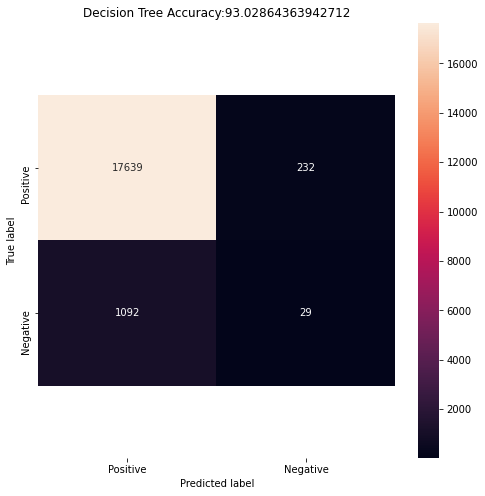

In [ ]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(X_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(X_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['Positive','Negative'],
columns = ['Positive','Negative'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')